<a href="https://colab.research.google.com/github/fabricejumel/FNST_google_collab_training/blob/main/facestyliser/Test_mediapipe_image_stilyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation
!pip install mediapipe opencv-python matplotlib

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
import urllib.request
import time
import os

# Télécharge 3 styles officiels
styles = {
    'color_sketch': 'https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_color_sketch.task',
    'color_ink': 'https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_color_ink.task',
    'oil_painting': 'https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_oil_painting.task',
    'blaze': 'https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/1/blaze_face_stylizer.task'
}

for name, url in styles.items():
    urllib.request.urlretrieve(url, f"{name}.task")
    print(f"✅ {name}.task téléchargé")


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


✅ color_sketch.task téléchargé
✅ color_ink.task téléchargé
✅ oil_painting.task téléchargé
✅ blaze.task téléchargé


📁 Upload image:


Saving test_16.jpg to test_16.jpg


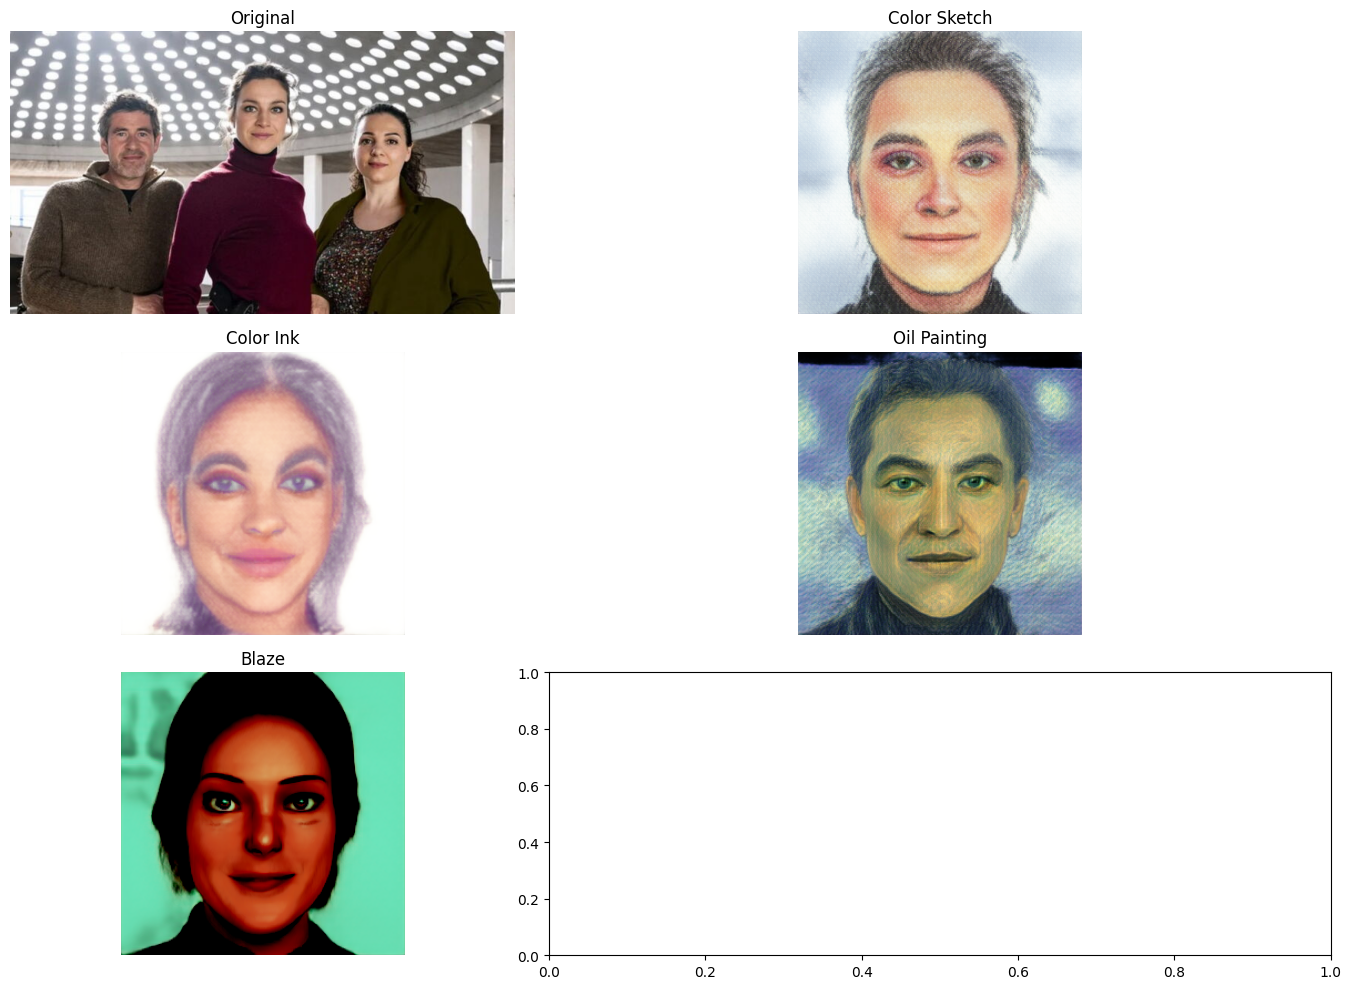

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Images stylisées sauvegardées!


In [2]:
BaseOptions = python.BaseOptions
FaceStylizer = vision.FaceStylizer
FaceStylizerOptions = vision.FaceStylizerOptions
VisionRunningMode = vision.RunningMode

def stylize_image(image_path, style_name):
    # Changed delegate from GPU to CPU to avoid GPU initialization errors
    base_options = BaseOptions(model_asset_path=f'{style_name}.task', delegate=BaseOptions.Delegate.CPU)
    # Removed 'running_mode' from FaceStylizerOptions as it caused a TypeError
    options = FaceStylizerOptions(base_options=base_options)

    # Removed 'running_mode' from create_from_options as it also caused a TypeError in a previous attempt
    with FaceStylizer.create_from_options(options) as stylizer:
        image = cv2.imread(image_path)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb)
        styled = stylizer.stylize(mp_image)
        return styled.numpy_view()

# Upload image
print("📁 Upload image:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Test 3 styles
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
image_rgb = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

for i, (name, ax) in enumerate(zip(['Original'] + list(styles.keys()), axes.flat)):
    if i == 0:
        ax.imshow(image_rgb); ax.set_title('Original')
    else:
        styled = stylize_image(filename, list(styles.keys())[i-1])
        ax.imshow(styled); ax.set_title(f'{list(styles.keys())[i-1].replace("_", " ").title()}')
    ax.axis('off')

plt.tight_layout(); plt.show()

# Download tous styles
for style in styles:
    styled_bgr = cv2.cvtColor(stylize_image(filename, style), cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'{style}_output.jpg', styled_bgr)
files.download(f'{list(styles.keys())[0]}_output.jpg')
print("✅ Images stylisées sauvegardées!")